In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("CO2.csv")
# Check for missing values


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64


In [3]:
mean1 = df['Carbon Dioxide (ppm)'].mean()
mean2 = df['Seasonally Adjusted CO2 (ppm)'].mean()
mean3 = df['Carbon Dioxide Fit (ppm)'].mean()
mean4 = df['Seasonally Adjusted CO2 Fit (ppm)'].mean()


# Now replace missing values with their respective means
df['Carbon Dioxide (ppm)'].fillna(mean1, inplace=True)
df['Seasonally Adjusted CO2 (ppm)'].fillna(mean2, inplace=True)
df['Carbon Dioxide Fit (ppm)'].fillna(mean3, inplace=True)
df['Seasonally Adjusted CO2 Fit (ppm)'].fillna(mean4, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_24088\3347801069.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Carbon Dioxide (ppm)'].fillna(mean1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_24088\3347801069.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:

print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Year                                 0
Month                                0
Decimal Date                         0
Carbon Dioxide (ppm)                 0
Seasonally Adjusted CO2 (ppm)        0
Carbon Dioxide Fit (ppm)             0
Seasonally Adjusted CO2 Fit (ppm)    0
dtype: int64


In [5]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Optionally, convert the new "Date" column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [6]:
df.drop(columns=['Month'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [7]:
df.head()

,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date
0,1958.0411,352.375633,352.375206,352.054074,352.04983,1958-01-01
1,1958.1260,352.375633,352.375206,352.054074,352.04983,1958-02-01
2,1958.2027,315.690000,314.420000,316.180000,314.89000,1958-03-01
3,1958.2877,317.450000,315.150000,317.300000,314.98000,1958-04-01
4,1958.3699,317.500000,314.730000,317.830000,315.06000,1958-05-01


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Define the numeric columns for scaling
numeric_columns = ['Decimal Date', 'Carbon Dioxide (ppm)', 'Seasonally Adjusted CO2 (ppm)', 
                   'Carbon Dioxide Fit (ppm)', 'Seasonally Adjusted CO2 Fit (ppm)']

# Separate the numeric data
numeric_data = df[numeric_columns]

# Perform normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=numeric_columns)

# Combine the non-numeric columns with the scaled numeric columns
df_scaled = pd.concat([df['Date'], df_normalized], axis=1)

# Display the scaled DataFrame
df_scaled.head()


,Date,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-01-01,0.000000,0.414714,0.414268,0.417632,0.408619
1,1958-02-01,0.001417,0.414714,0.414268,0.417632,0.408619
2,1958-03-01,0.002697,0.026260,0.000000,0.039334,0.000000
3,1958-04-01,0.004116,0.044896,0.007968,0.051144,0.000990
4,1958-05-01,0.005488,0.045426,0.003384,0.056733,0.001869


In [9]:
#making data stationary
import numpy as np
numeric_columns = ['Decimal Date', 'Carbon Dioxide (ppm)', 'Seasonally Adjusted CO2 (ppm)', 
                   'Carbon Dioxide Fit (ppm)', 'Seasonally Adjusted CO2 Fit (ppm)']
df_diff = df_scaled[numeric_columns].diff().dropna()
df_log_diff = df_diff.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

df_log_diff.head()


,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
1,0.001416,0.000000,0.000000,0.000000,0.000000
2,0.001279,-0.491766,-0.534892,-0.475296,-0.525295
3,0.001418,0.018465,0.007936,0.011741,0.000989
4,0.001371,0.000529,-0.004595,0.005573,0.000879
5,0.001416,0.314291,0.344217,-0.006453,0.000879


# Arima Model

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


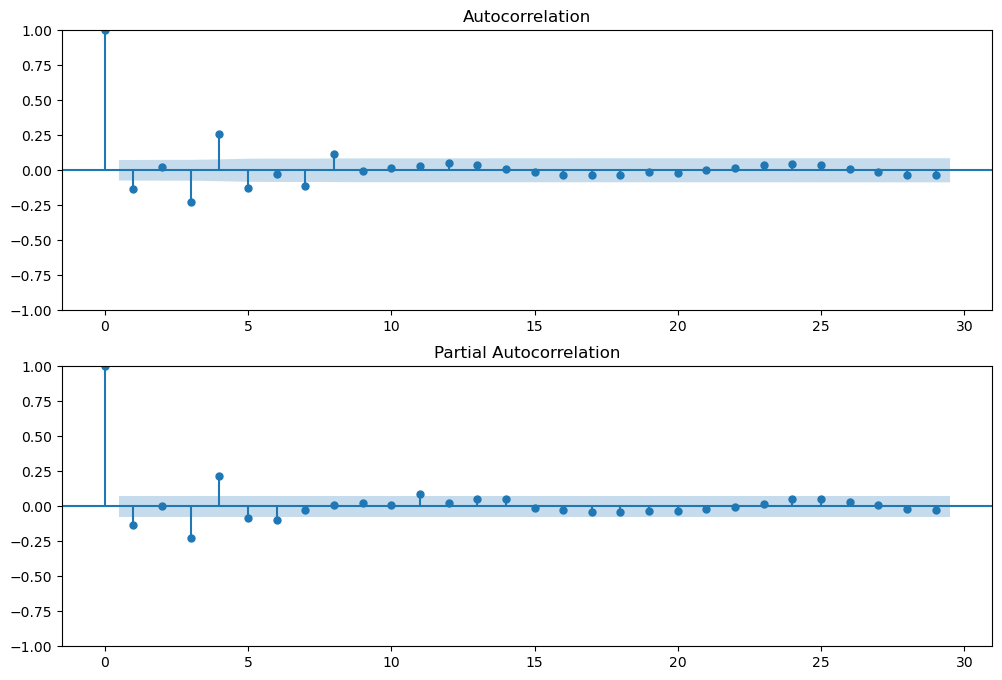

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Carbon Dioxide (ppm)   No. Observations:                  719
Model:                   ARIMA(1, 1, 1)   Log Likelihood                1083.183
Date:                  Sat, 11 May 2024   AIC                          -2160.367
Time:                          15:59:33   BIC                          -2146.637
Sample:                               0   HQIC                         -2155.066
                                  - 719                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1335      0.012    -11.575      0.000      -0.156      -0.111
ma.L1         -0.9924      0.015    -68.297      0.000      -1.021      -0.964
sigma2         0.0028   2.55e-05    

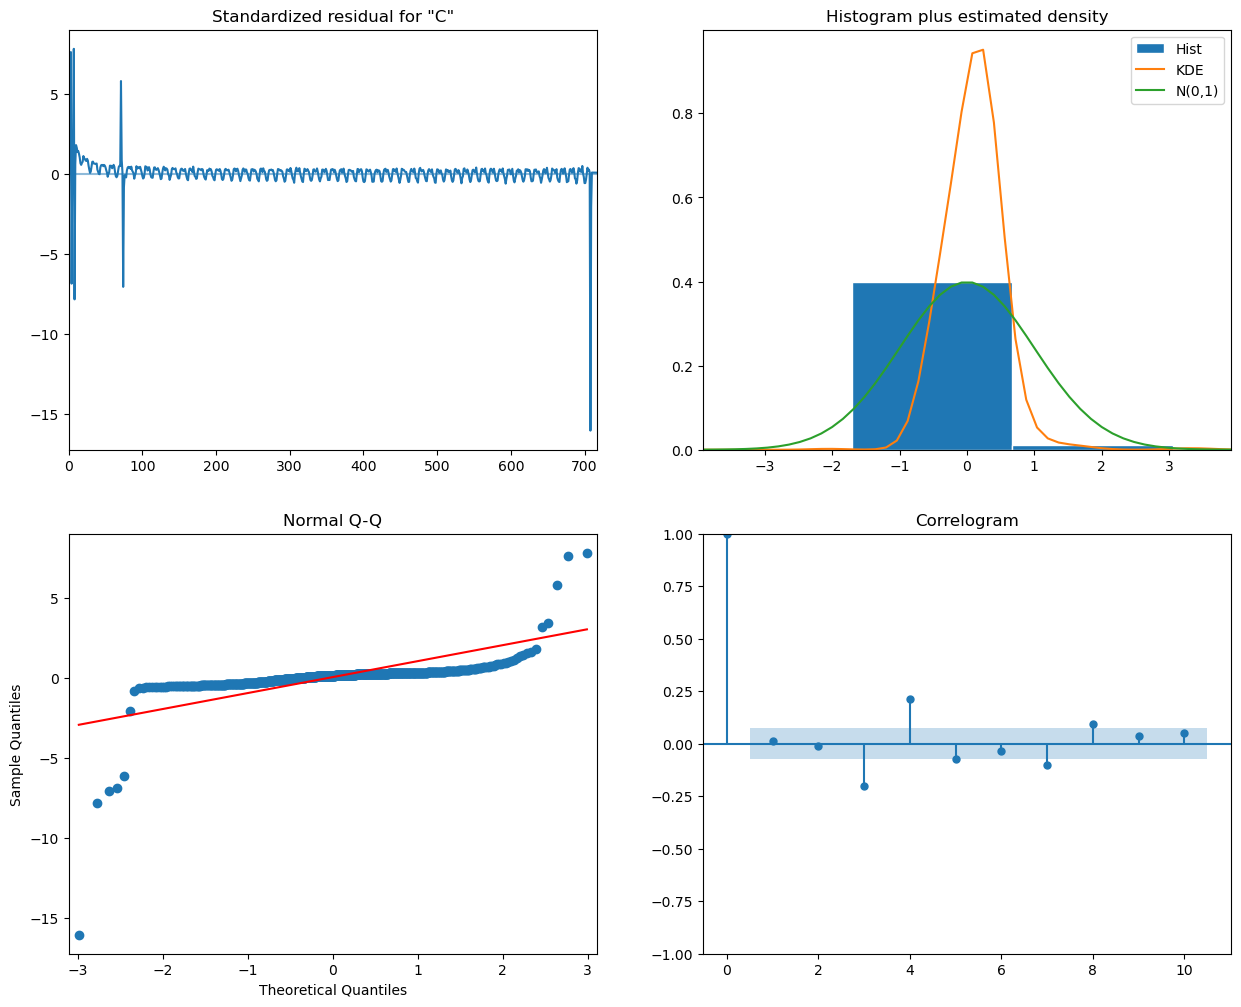

Forecasted values: 719   -0.005020
720   -0.004350
721   -0.004439
722   -0.004427
723   -0.004429
724   -0.004429
725   -0.004429
726   -0.004429
727   -0.004429
728   -0.004429
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Check stationarity again if necessary
# (e.g., using ADF test)

# Plot ACF and PACF plots to determine p and q values
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df_log_diff['Carbon Dioxide (ppm)'], ax=axes[0])
plot_pacf(df_log_diff['Carbon Dioxide (ppm)'], ax=axes[1])
plt.show()

# Based on the ACF and PACF plots, determine the values of p and q

# Fit the ARIMA model
p = 1# determined value
d = 1  # already differenced once
q = 1# determined value

model = ARIMA(df_log_diff['Carbon Dioxide (ppm)'], order=(p, d, q))
arima_model = model.fit()

# Summary of the ARIMA model
print(arima_model.summary())

# Plot residuals
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast future values
forecast_steps = 10  # adjust as needed
forecast = arima_model.forecast(steps=forecast_steps)
print("Forecasted values:", forecast)


# ANN Design and Training:

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split data into features and target variable
X = df_scaled.drop(columns=['Date'])
y = df_scaled['Carbon Dioxide (ppm)']  # Assuming 'Carbon Dioxide (ppm)' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Design the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error (MSE) loss for regression

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test MAE (Mean Absolute Error):", test_mae)


Epoch 1/100
15/15 [==============================] - 1s 24ms/step - loss: 0.2926 - mae: 0.4399 - val_loss: 0.1113 - val_mae: 0.2604
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0753 - mae: 0.2114 - val_loss: 0.0175 - val_mae: 0.1041
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0105 - mae: 0.0834 - val_loss: 0.0058 - val_mae: 0.0656
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0571 - val_loss: 0.0032 - val_mae: 0.0476
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0024 - mae: 0.0427 - val_loss: 0.0017 - val_mae: 0.0343
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 6.9251e-04 - val_mae: 0.0209
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 4.8567e-04 - mae: 0.0162 - val_loss: 2.8780e-04 - val_mae: 0.0140
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - los

Epoch 60/100
15/15 [==============================] - 0s 7ms/step - loss: 3.5590e-06 - mae: 0.0015 - val_loss: 4.4251e-06 - val_mae: 0.0016
Epoch 61/100
15/15 [==============================] - 0s 7ms/step - loss: 3.5683e-06 - mae: 0.0015 - val_loss: 4.0454e-06 - val_mae: 0.0016
Epoch 62/100
15/15 [==============================] - 0s 6ms/step - loss: 3.5502e-06 - mae: 0.0014 - val_loss: 4.1927e-06 - val_mae: 0.0016
Epoch 63/100
15/15 [==============================] - 0s 6ms/step - loss: 3.4667e-06 - mae: 0.0015 - val_loss: 4.0261e-06 - val_mae: 0.0015
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 3.5508e-06 - mae: 0.0014 - val_loss: 5.4846e-06 - val_mae: 0.0018
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 3.4833e-06 - mae: 0.0015 - val_loss: 3.5688e-06 - val_mae: 0.0015
Epoch 66/100
15/15 [==============================] - 0s 7ms/step - loss: 3.1432e-06 - mae: 0.0014 - val_loss: 3.4993e-06 - val_mae: 0.0014
Epoch 67/100
15/15 [

# SARIMA (Seasonal ARIMA):

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


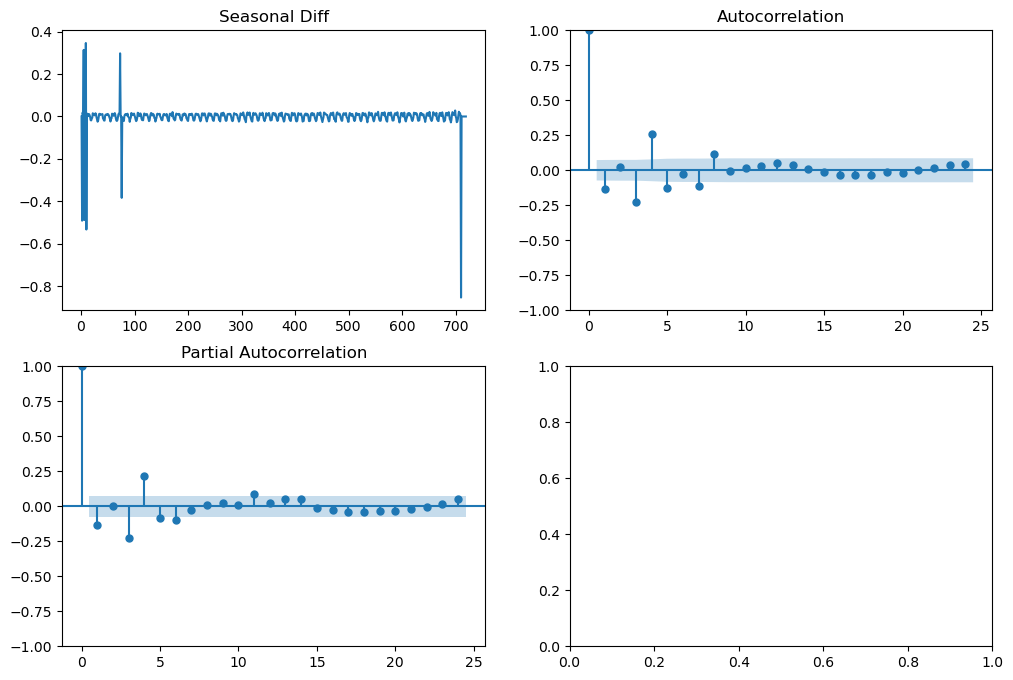

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:               Carbon Dioxide (ppm)   No. Observations:                  720
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1223.964
Date:                            Sat, 11 May 2024   AIC                          -2437.929
Time:                                    16:00:14   BIC                          -2415.124
Sample:                                         0   HQIC                         -2429.118
                                            - 720                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.035     11.929      0.000       0.346       0.482
ma.L1         -0.6867      0.031   

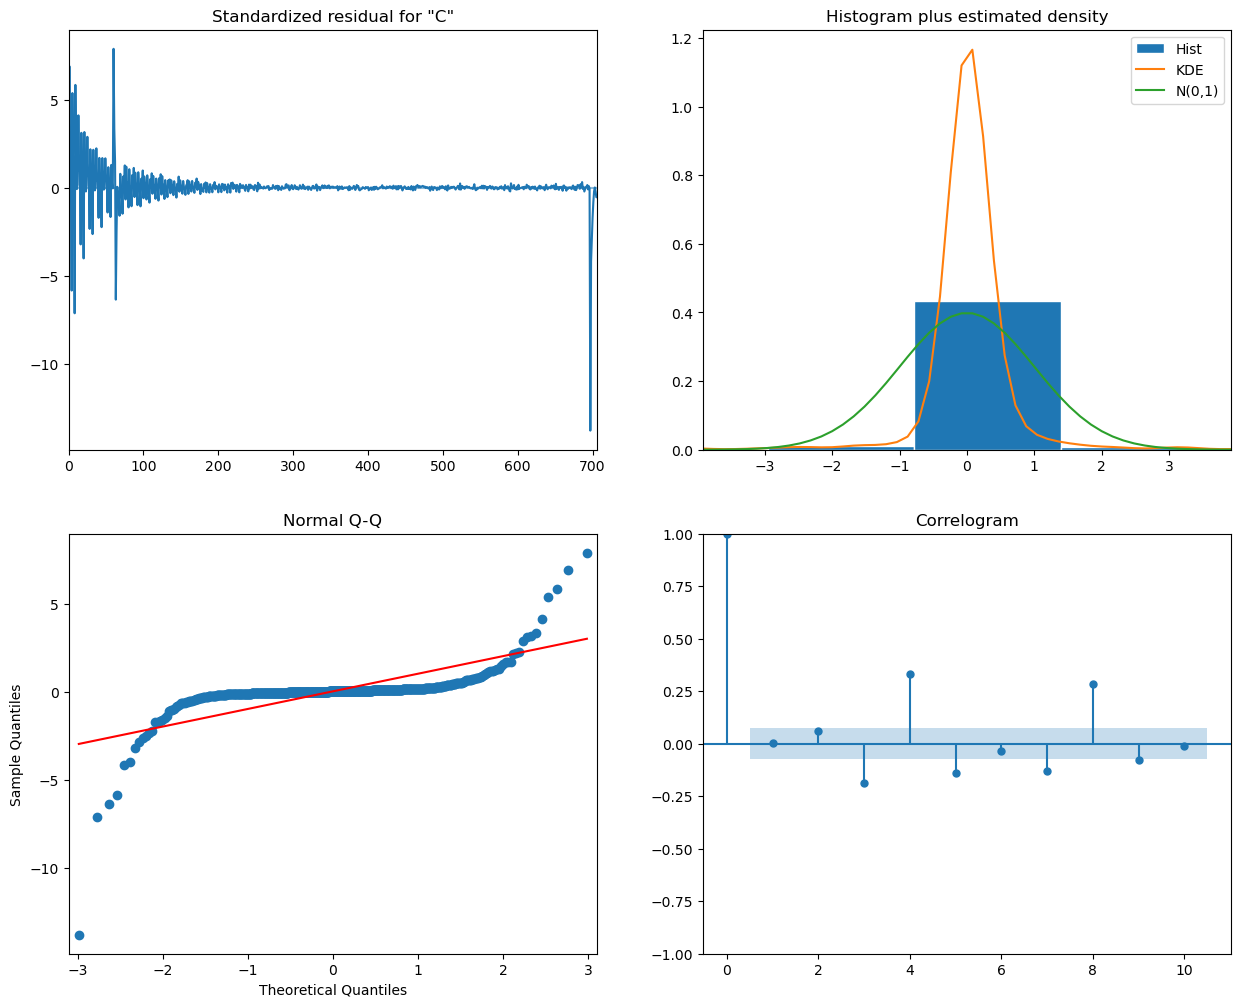

SARIMA Forecasted values: 720    0.436854
721    0.449149
722    0.376417
723    0.392336
724    0.398474
725    0.391815
726    0.376547
727    0.357149
728    0.343178
729    0.345165
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


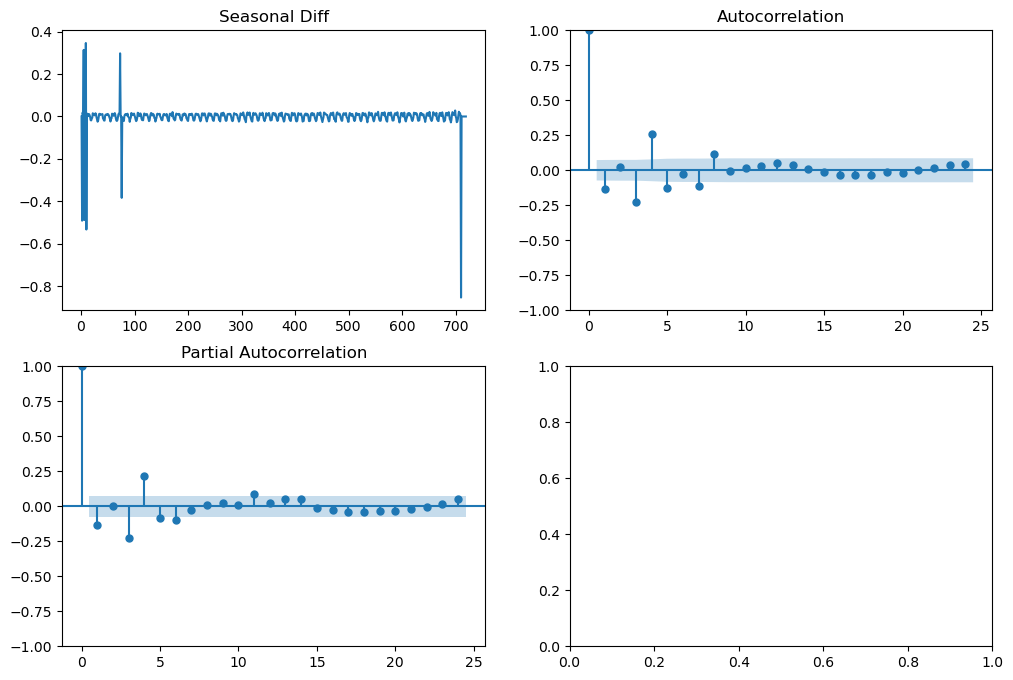

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:               Carbon Dioxide (ppm)   No. Observations:                  720
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1223.964
Date:                            Sat, 11 May 2024   AIC                          -2437.929
Time:                                    16:00:23   BIC                          -2415.124
Sample:                                         0   HQIC                         -2429.118
                                            - 720                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.035     11.929      0.000       0.346       0.482
ma.L1         -0.6867      0.031   

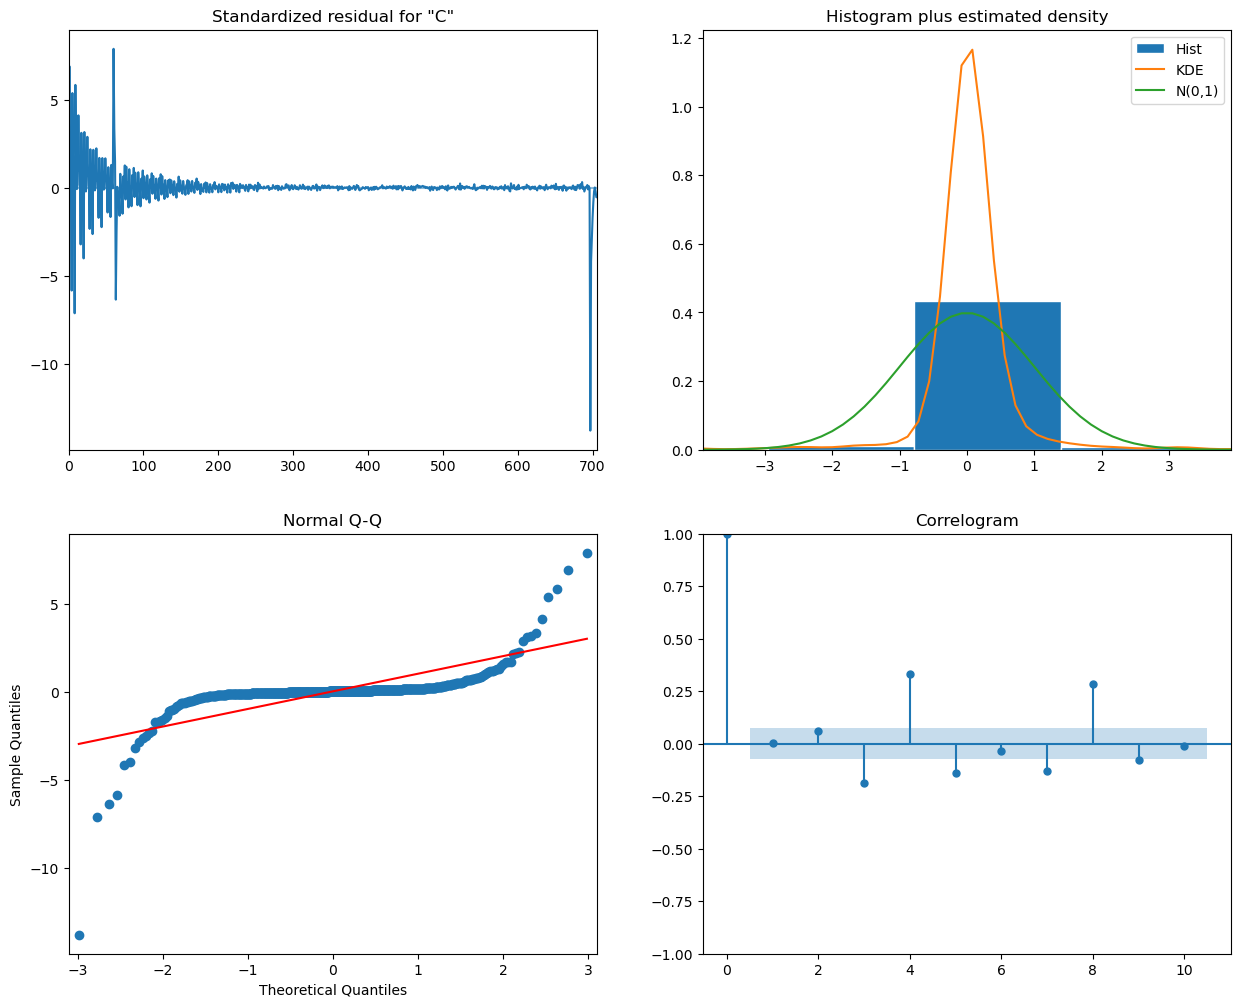

SARIMA Forecasted values: 720    0.436854
721    0.449149
722    0.376417
723    0.392336
724    0.398474
725    0.391815
726    0.376547
727    0.357149
728    0.343178
729    0.345165
Name: predicted_mean, dtype: float64


In [12]:
import statsmodels.api as sm

# Check stationarity and difference data if necessary

# Plot seasonal ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(df_log_diff['Carbon Dioxide (ppm)'])
axes[0, 0].set_title('Seasonal Diff')
axes[0, 1].set_title('Seasonal ACF')
sm.graphics.tsa.plot_acf(df_log_diff['Carbon Dioxide (ppm)'], lags=12*2, ax=axes[0, 1])
axes[1, 0].set_title('Seasonal PACF')
sm.graphics.tsa.plot_pacf(df_log_diff['Carbon Dioxide (ppm)'], lags=12*2, ax=axes[1, 0])
plt.show()

# Determine the values of d, D, p, P, q, and Q based on the plots

# Fit the SARIMA model
p = 1
d = 1  # already differenced once
q = 1
P = 1
D = 1  # seasonal differencing once
Q = 1

sarima_model = sm.tsa.SARIMAX(df_scaled['Carbon Dioxide (ppm)'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
sarima_result = sarima_model.fit()

# Summary of the SARIMA model
print(sarima_result.summary())

# Plot residuals
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast future values
sarima_forecast = sarima_result.forecast(steps=10)  # adjust steps as needed
print("SARIMA Forecasted values:", sarima_forecast)
import statsmodels.api as sm

# Check stationarity and difference data if necessary

# Plot seasonal ACF and PACF plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(df_log_diff['Carbon Dioxide (ppm)'])
axes[0, 0].set_title('Seasonal Diff')
axes[0, 1].set_title('Seasonal ACF')
sm.graphics.tsa.plot_acf(df_log_diff['Carbon Dioxide (ppm)'], lags=12*2, ax=axes[0, 1])
axes[1, 0].set_title('Seasonal PACF')
sm.graphics.tsa.plot_pacf(df_log_diff['Carbon Dioxide (ppm)'], lags=12*2, ax=axes[1, 0])
plt.show()

# Determine the values of d, D, p, P, q, and Q based on the plots

# Fit the SARIMA model
p = 1 
d = 1
q =1 
P = 1
D = 1  
Q = 1

sarima_model = sm.tsa.SARIMAX(df_scaled['Carbon Dioxide (ppm)'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
sarima_result = sarima_model.fit()

# Summary of the SARIMA model
print(sarima_result.summary())

# Plot residuals
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()

# Forecast future values
sarima_forecast = sarima_result.forecast(steps=10)  # adjust steps as needed
print("SARIMA Forecasted values:", sarima_forecast)


# Exponential Smoothing (ETS):

In [13]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Step 2: Model Selection
# Triple Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(df['Carbon Dioxide (ppm)'], trend='add', seasonal='add', seasonal_periods=12)

# Step 3: Fit the model
fitted_model = model.fit()

# Step 4: Predictions
# Assuming you want to forecast the next 12 periods
forecast = fitted_model.forecast(12)

# Step 5: Evaluation
# Assuming you have a separate DataFrame called 'actual_df' containing the actual values for the forecasted period
actual_values = df['Carbon Dioxide (ppm)'][-12:]  # Extract the last 12 actual values corresponding to the forecast

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast)

# Calculate Percentage of Accuracy
percentage_accuracy = 1 - (mae / actual_values.mean())  # Percentage of accuracy

# Print forecast
print("Forecasted values:", forecast)

# Print MAE and Percentage of Accuracy
print("Mean Absolute Error (MAE):", mae)
print("Percentage of Accuracy:", percentage_accuracy)

Forecasted values: 720    353.953069
721    355.251838
722    354.525875
723    355.839986
724    355.904721
725    355.921703
726    353.891184
727    351.926349
728    350.291852
729    350.945073
730    351.632232
731    352.905122
dtype: float64
Mean Absolute Error (MAE): 10.245575953145552
Percentage of Accuracy: 0.9716481341993163


# Prophet:

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df1 = pd.read_csv("CO2.csv")



In [15]:
# Check for missing values
mean1 = df1['Carbon Dioxide (ppm)'].mean()
mean2 = df1['Seasonally Adjusted CO2 (ppm)'].mean()
mean3 = df1['Carbon Dioxide Fit (ppm)'].mean()
mean4 = df1['Seasonally Adjusted CO2 Fit (ppm)'].mean()


# Now replace missing values with their respective means
df1['Carbon Dioxide (ppm)'].fillna(mean1, inplace=True)
df1['Seasonally Adjusted CO2 (ppm)'].fillna(mean2, inplace=True)
df1['Carbon Dioxide Fit (ppm)'].fillna(mean3, inplace=True)
df1['Seasonally Adjusted CO2 Fit (ppm)'].fillna(mean4, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_24088\922082713.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Carbon Dioxide (ppm)'].fillna(mean1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_24088\922082713.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [16]:
df1.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,352.375633,352.375206,352.054074,352.04983
1,1958,2,1958.1260,352.375633,352.375206,352.054074,352.04983
2,1958,3,1958.2027,315.690000,314.420000,316.180000,314.89000
3,1958,4,1958.2877,317.450000,315.150000,317.300000,314.98000
4,1958,5,1958.3699,317.500000,314.730000,317.830000,315.06000


In [17]:
df1['Date'] = df1['Year'].astype(str) + '-' + df1['Month'].astype(str)

# Optionally, convert the new "Date" column to datetime type
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')


In [18]:
#df.set_index('Date', inplace=True)
df1.drop(columns=['Month'], inplace=True)
df1.drop(columns=['Year'], inplace=True)

df1.head()

,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date
0,1958.0411,352.375633,352.375206,352.054074,352.04983,1958-01-01
1,1958.1260,352.375633,352.375206,352.054074,352.04983,1958-02-01
2,1958.2027,315.690000,314.420000,316.180000,314.89000,1958-03-01
3,1958.2877,317.450000,315.150000,317.300000,314.98000,1958-04-01
4,1958.3699,317.500000,314.730000,317.830000,315.06000,1958-05-01


16:00:36 - cmdstanpy - INFO - Chain [1] start processing
16:00:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\anaconda3\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\HP\anaconda3\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\HP\anaconda3\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return

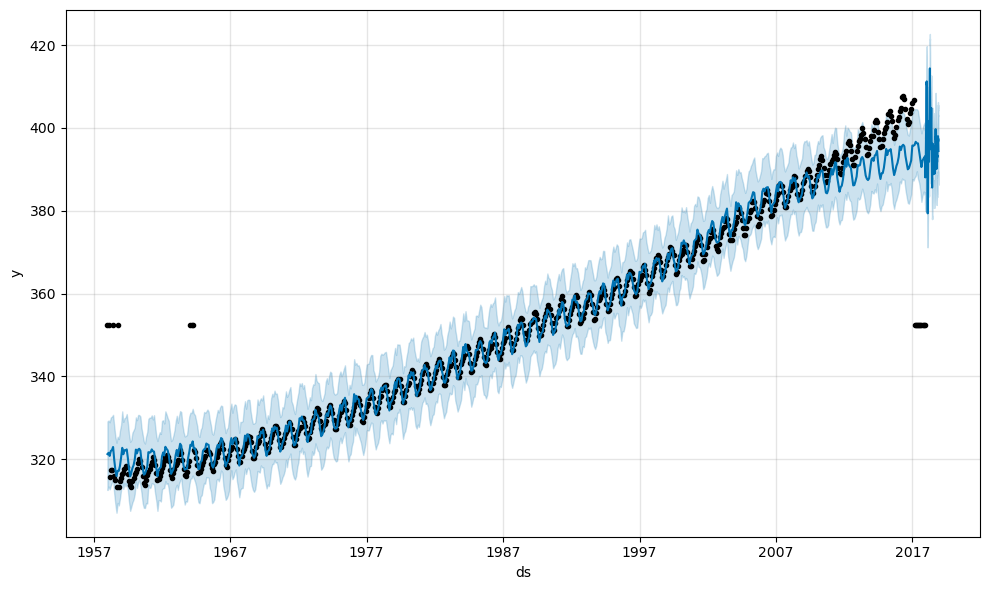

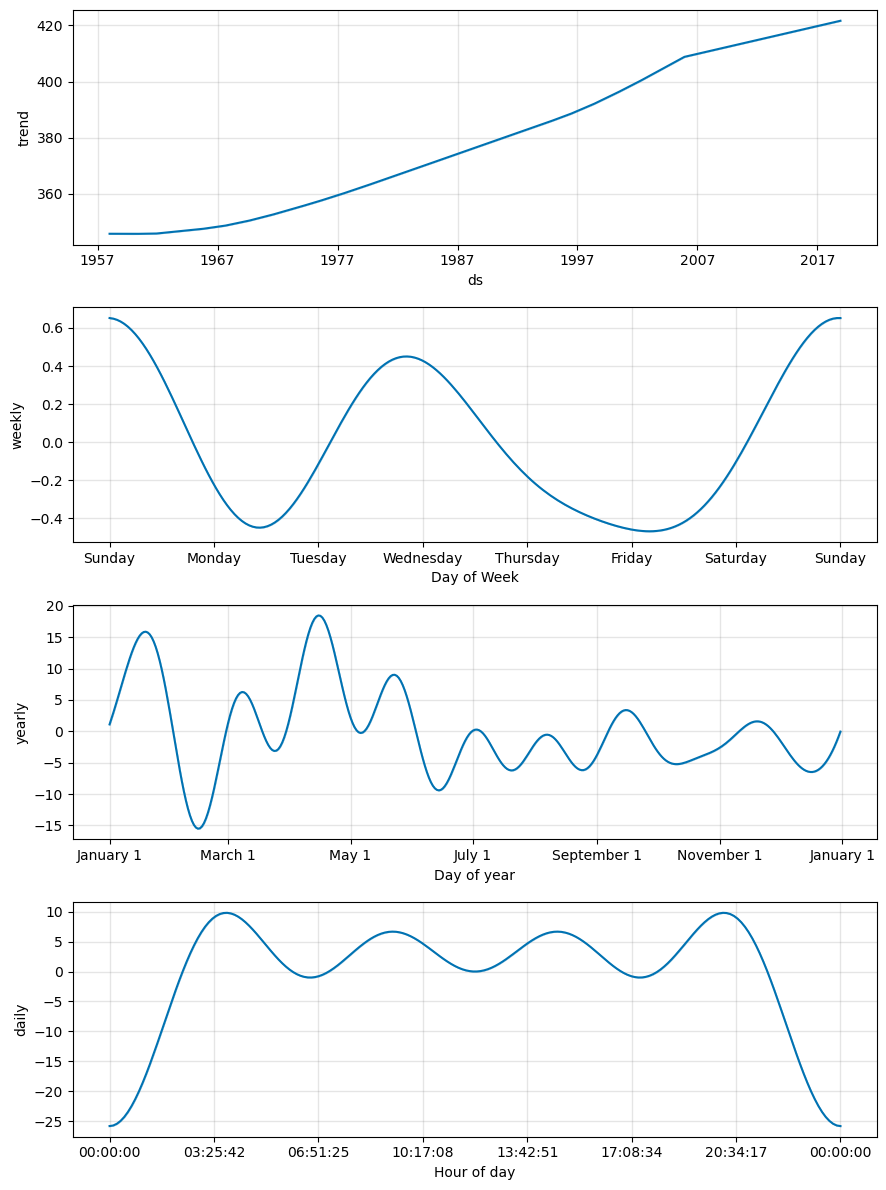

             ds        yhat  yhat_lower  yhat_upper
1080 2018-11-27  396.042792  388.084936  404.427274
1081 2018-11-28  396.221477  387.722511  404.436246
1082 2018-11-29  395.216783  386.492170  403.082487
1083 2018-11-30  394.512721  386.451948  402.863465
1084 2018-12-01  394.422512  386.274820  403.104762


In [19]:
import pandas as pd
from prophet import Prophet


# Prepare the data for Prophet
# Assuming 'Date' is in a format that Prophet can parse and 'Carbon Dioxide (ppm)' is the target variable
df_prophet = pd.DataFrame({
    'ds': df1['Date'],
    'y': df1['Carbon Dioxide (ppm)']
})

# Initialize the Prophet model with daily, weekly, and yearly seasonality
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

# Fit the model
model.fit(df_prophet)

# Create a dataframe for future predictions
future_dates = model.make_future_dataframe(periods=365)  # For example, predict the next year

# Predict future values
forecast = model.predict(future_dates)

# Plot the forecast
fig_forecast = model.plot(forecast)
fig_components = model.plot_components(forecast)

# Display the forecast
plt.show()

# Optional: Extract forecasted values and confidence intervals
predicted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(predicted_values.tail())

# Support Vector Regression (SVR):

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your data is stored in a DataFrame named df
# Assuming 'Date' is the index column and 'Carbon Dioxide (ppm)' is the target variable

# Reset the index if 'Date' is the index column
df.reset_index(inplace=True)

# Extract features (X) and target variable (y)
X = df[['Decimal Date']]  # Using only the 'Decimal Date' as feature for demonstration
y = df['Carbon Dioxide (ppm)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


Mean Squared Error: 705.952305713084


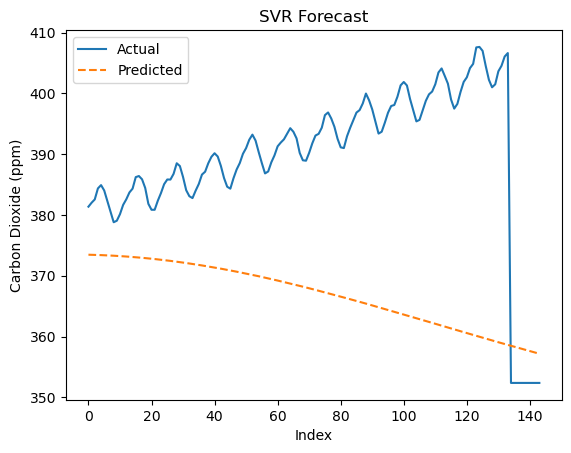

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your data is already prepared and stored in X_train, y_train, X_test, y_test

# Define and train SVR model
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel with default parameters
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot predictions
plt.plot(np.arange(len(y_test)), y_test, label='Actual')  # Using numpy.arange to create a sequence of indices
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Carbon Dioxide (ppm)')
plt.title('SVR Forecast')
plt.legend()
plt.show()


In [22]:
# Drop rows with missing values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Extract features (X) and target variable (y)
X = df[['Decimal Date']]
y = df['Carbon Dioxide (ppm)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


# Long Short-Term Memory (LSTM):

Epoch 1/100
18/18 [==============================] - 3s 47ms/step - loss: 118041.0703 - val_loss: 151963.5156
Epoch 2/100
18/18 [==============================] - 0s 10ms/step - loss: 117989.2344 - val_loss: 151966.6875
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 117929.0156 - val_loss: 151967.5938
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 117854.2344 - val_loss: 151969.6250
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 117757.1562 - val_loss: 151969.0469
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 117634.3750 - val_loss: 151971.1875
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 117481.8047 - val_loss: 151977.2188
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 117292.7656 - val_loss: 151982.5000
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 117071.9844 - val_loss: 152003.1875
Epoch 10/100
18/1

Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 77768.0938 - val_loss: 121497.5000
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 77217.6172 - val_loss: 120616.2500
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 76671.3594 - val_loss: 119699.6797
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 76128.1016 - val_loss: 118819.6641
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 75588.9844 - val_loss: 117944.2500
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 75055.2812 - val_loss: 117046.8750
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 74525.3438 - val_loss: 116178.9141
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 73999.1562 - val_loss: 115319.6797
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 73477.4219 - val_loss: 114466.5703
Epoch 85/100
18/18 

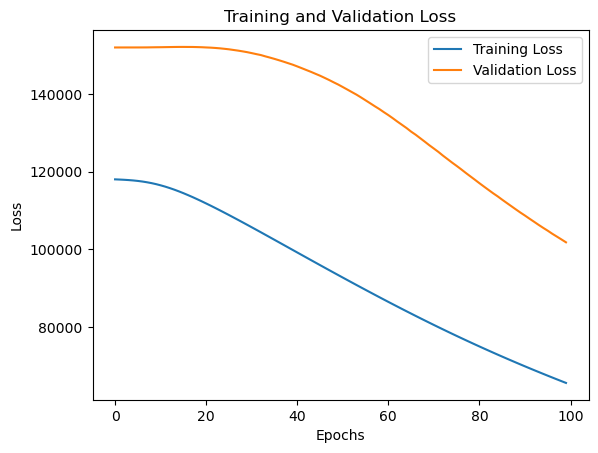

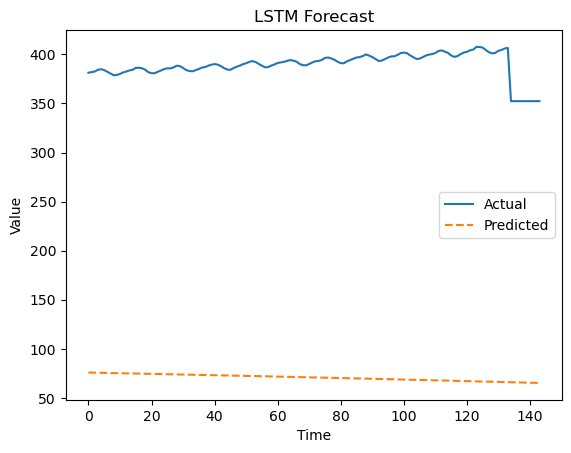

In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your data is already prepared and stored in X_train, y_train, X_test, y_test

# Define LSTM model architecture
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot predictions
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Forecast')
plt.legend()
plt.show()


# Hybrid Models Integration:

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Epoch 1/100


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


15/15 [==============================] - 1s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
15/15 [==============================] - 0s 8ms

15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 70/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 71/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 72/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 73/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 74/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 75/100
15/15 [==============================] - 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 76/100
15/15 [==============================] - 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 77/100
15/15 [==============================] -

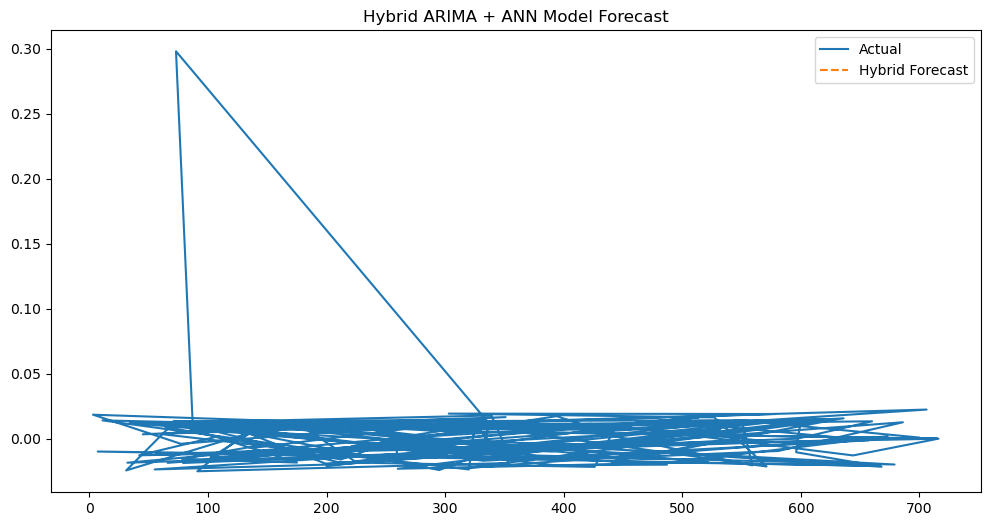

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from sklearn.metrics import mean_squared_error


# Separate the numeric data
numeric_data = df[numeric_columns]

# Perform normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Convert the normalized data back to a DataFrame
df_normalized = pd.DataFrame(normalized_data, columns=numeric_columns)

# Combine the non-numeric columns with the scaled numeric columns
df_scaled = pd.concat([df['Date'], df_normalized], axis=1)

# Making data stationary
df_diff = df_scaled[numeric_columns].diff().dropna()
df_log_diff = df_diff.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)

# Fit the ARIMA model
model_arima = ARIMA(df_log_diff['Carbon Dioxide (ppm)'], order=(1, 1, 1))
arima_result = model_arima.fit()

# ARIMA predictions, ensuring to start after the first NaN
arima_predictions = arima_result.predict(start=1, end=len(df_log_diff))

# Residuals from the ARIMA model
residuals = df_log_diff['Carbon Dioxide (ppm)'].iloc[1:] - arima_predictions

# Prepare X for ANN using ARIMA predictions, aligning indices
X_ann = pd.DataFrame({
    'arima_preds': arima_predictions.values,
    'other_features': df_normalized['Decimal Date'].iloc[1:]  # Start from the first element to match indices
})


# Normalize the input features
scaler_ann = MinMaxScaler()
X_ann_scaled = scaler_ann.fit_transform(X_ann)

# Ensure alignment of indices
y_ann = residuals.reset_index(drop=True)

# Split data for training and testing the ANN
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann_scaled, y_ann, test_size=0.2, random_state=42)

# Design the ANN architecture
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_ann.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer to predict residuals
])

# Compile the ANN model
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the ANN model
history_ann = model_ann.fit(X_train_ann, y_train_ann, epochs=100, batch_size=32, validation_split=0.2)

# Predict residuals on the test set
predicted_residuals = model_ann.predict(X_test_ann)

# Adjust ARIMA predictions by adding predicted residuals
adjusted_forecasts = arima_predictions.values[y_test_ann.index] + predicted_residuals.flatten()

# Plot actual vs adjusted forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_log_diff.index[y_test_ann.index], df_log_diff['Carbon Dioxide (ppm)'].iloc[y_test_ann.index], label='Actual')
plt.plot(df_log_diff.index[y_test_ann.index], adjusted_forecasts, label='Hybrid Forecast', linestyle='--')
plt.legend()
plt.title('Hybrid ARIMA + ANN Model Forecast')
plt.show()



In [25]:
print(np.isnan(adjusted_forecasts).any())
print(np.isinf(adjusted_forecasts).any())


True
False


In [ ]:
adjusted_forecasts

In [ ]:
# Adjust ARIMA predictions by adding predicted residuals
adjusted_forecasts = arima_predictions.values[y_test_ann.index] + predicted_residuals.flatten()


In [ ]:
predicted_residuals